# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [16]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [17]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [18]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [19]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_Test_OneHot = tf.keras.utils.to_categorical(y_test_label)

# 建立模型

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
#宣告採用序列模型
model = Sequential()

In [24]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [25]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [27]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [28]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 65us/sample - loss: 0.2646 - accuracy: 0.9243 - val_loss: 0.1383 - val_accuracy: 0.9579
Epoch 2/10
48000/48000 [==============================] - 3s 54us/sample - loss: 0.1079 - accuracy: 0.9681 - val_loss: 0.1000 - val_accuracy: 0.9695
Epoch 3/10
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0701 - accuracy: 0.9794 - val_loss: 0.0967 - val_accuracy: 0.9719
Epoch 4/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0810 - val_accuracy: 0.9765
Epoch 5/10
48000/48000 [==============================] - 3s 54us/sample - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0835 - val_accuracy: 0.9757
Epoch 6/10
48000/48000 [==============================] - 3s 54us/sample - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0809 - val_accuracy: 0.9780
Epoch 7/10
48000/48000 [==============================] 

# 以圖形顯示訓練過程

In [29]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [30]:
show_train_history(train_history,'acc','val_acc')

KeyError: 'acc'

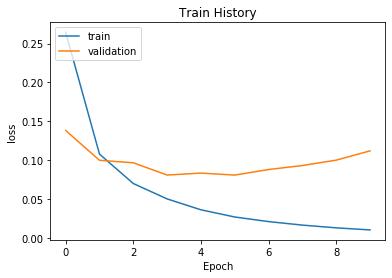

In [32]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [31]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


accuracy= 0.9759
